# Homework 9

> I pledge my Honor that I have abided by the Stevens Honor System. - Joshua Schmidt

create spark context

In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('recommend-ML').getOrCreate()

read in ratings csv in same format

In [6]:
import pandas as pd
import numpy as np

user_df = pd.read_csv('data/test2_new.txt', names=['userID', 'trackID', 'recommendation'], sep='|')
user_df['recommendation'] = np.where(user_df['recommendation'], 'yes', 'no')

genre_columns = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', \
                  'genre6', 'genre7', 'genre8', 'genre9', 'genre10', \
                  'genre11', 'genre12', 'genre13', 'genre14', 'genre15', \
                  'genre16', 'genre17', 'genre18', 'genre19', 'genre20', \
                  'genre21']

track_df = pd.read_csv('data/trackData2.txt', sep='|', names=['trackID', 'album', 'artist', *genre_columns])
track_df['num_genre_ratings'] = (np.logical_not(track_df[genre_columns].isnull())).astype(int).sum(axis=1)

all_data_df = pd.merge(user_df, track_df, on='trackID')

stats_columns = ['album', 'artist', 'num_genre_ratings']
all_stats = all_data_df[genre_columns].apply(pd.DataFrame.describe, axis=1)
all_data_df['max'], all_data_df['min'], all_data_df['mean'], all_data_df['median'] = \
    all_stats['max'], all_stats['min'], all_stats['mean'], all_stats['50%']
all_data_df['variance'] = all_stats['std']**2
all_data_df

,userID,trackID,recommendation,album,artist,genre1,genre2,genre3,genre4,genre5,...,genre18,genre19,genre20,genre21,num_genre_ratings,max,min,mean,median,variance
0,200031,30877,yes,192723,132319,131552.0,176858.0,218185.0,251593.0,266073.0,...,NaN,NaN,NaN,NaN,6,266073.0,67098.0,185226.500000,197521.5,5.786452e+09
1,200349,30877,yes,192723,132319,131552.0,176858.0,218185.0,251593.0,266073.0,...,NaN,NaN,NaN,NaN,6,266073.0,67098.0,185226.500000,197521.5,5.786452e+09
2,201900,30877,yes,192723,132319,131552.0,176858.0,218185.0,251593.0,266073.0,...,NaN,NaN,NaN,NaN,6,266073.0,67098.0,185226.500000,197521.5,5.786452e+09
3,200031,8244,yes,223220,233697,131552.0,176858.0,218185.0,75691.0,67098.0,...,NaN,NaN,NaN,NaN,5,218185.0,67098.0,133876.800000,131552.0,4.201414e+09
4,200031,130183,no,None,None,139095.0,242383.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,242383.0,139095.0,190739.000000,190739.0,5.334205e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,212226,5696,yes,16106,65699,33722.0,224280.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,224280.0,33722.0,129001.000000,129001.0,1.815618e+10
5996,212234,217037,no,180559,236943,131552.0,218185.0,243099.0,142021.0,214110.0,...,NaN,NaN,NaN,NaN,7,243099.0,67186.0,171022.714286,181006.0,3.759425e+09
5997,212234,137371,no,174016,178205,199606.0,105160.0,289568.0,48717.0,NaN,...,NaN,NaN,NaN,NaN,4,289568.0,48717.0,160762.750000,152383.0,1.124850e+10
5998,212234,83093,yes,284629,236546,131552.0,173467.0,146792.0,48505.0,154024.0,...,NaN,NaN,NaN,NaN,7,196528.0,48505.0,140575.285714,146792.0,2.174241e+09


In [12]:
exported_df = all_data_df[['userID', 'trackID', 'recommendation', 'album', 'artist', \
            'num_genre_ratings', 'max', 'min', 'mean', 'variance', 'median']].copy()
exported_df = exported_df.mask(exported_df.eq('None')).fillna(0)
exported_df = exported_df.sort_values(by='userID')
exported_df.to_csv('data/clean_data.csv', index=False)
exported_df

,userID,trackID,recommendation,album,artist,num_genre_ratings,max,min,mean,variance,median
0,200031,30877,yes,192723,132319,6,266073.0,67098.0,185226.500000,5.786452e+09,197521.5
3,200031,8244,yes,223220,233697,5,218185.0,67098.0,133876.800000,4.201414e+09,131552.0
4,200031,130183,no,0,0,2,242383.0,139095.0,190739.000000,5.334205e+09,190739.0
5,200031,198762,no,220103,113265,4,201738.0,47898.0,117510.250000,4.319529e+09,110202.5
6,200031,34503,yes,43738,173170,6,199606.0,51420.0,116350.166667,4.075785e+09,99441.5
...,...,...,...,...,...,...,...,...,...,...,...
5996,212234,217037,no,180559,236943,7,243099.0,67186.0,171022.714286,3.759425e+09,181006.0
2338,212234,277867,yes,213269,236546,5,173467.0,19913.0,101319.200000,4.137352e+09,131552.0
1607,212234,42375,no,105869,24208,9,274088.0,17453.0,134039.333333,9.031979e+09,88853.0
5998,212234,83093,yes,284629,236546,7,196528.0,48505.0,140575.285714,2.174241e+09,146792.0


In [13]:
#df = spark.read.csv('data/ratings.csv', header = True, inferSchema = True)
df = spark.read.csv('data/clean_data.csv', header = True, inferSchema = True)
cols = df.columns
df.printSchema()

root
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- recommendation: string (nullable = true)
 |-- album: integer (nullable = true)
 |-- artist: integer (nullable = true)
 |-- num_genre_ratings: integer (nullable = true)
 |-- max: double (nullable = true)
 |-- min: double (nullable = true)
 |-- mean: double (nullable = true)
 |-- variance: double (nullable = true)
 |-- median: double (nullable = true)



In [14]:
from pyspark.ml.feature import VectorAssembler

numericCols = ['album', 'artist', 'num_genre_ratings', 'max', 'min', 'mean', 'variance', 'median']
stages = []
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [15]:
from pyspark.ml.feature import StringIndexer

label_stringIdx = StringIndexer(inputCol = 'recommendation', outputCol = 'label')
stages += [label_stringIdx]

In [17]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- recommendation: string (nullable = true)
 |-- album: integer (nullable = true)
 |-- artist: integer (nullable = true)
 |-- num_genre_ratings: integer (nullable = true)
 |-- max: double (nullable = true)
 |-- min: double (nullable = true)
 |-- mean: double (nullable = true)
 |-- variance: double (nullable = true)
 |-- median: double (nullable = true)



In [18]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
label,1,1,0,0,1
features,"[192723.0, 132319.0, 6.0, 266073.0, 67098.0, 1...","[223220.0, 233697.0, 5.0, 218185.0, 67098.0, 1...","[0.0, 0.0, 2.0, 242383.0, 139095.0, 190739.0, ...","[220103.0, 113265.0, 4.0, 201738.0, 47898.0, 1...","[43738.0, 173170.0, 6.0, 199606.0, 51420.0, 11..."
userID,200031,200031,200031,200031,200031
trackID,30877,8244,130183,198762,34503
recommendation,yes,yes,no,no,yes
album,192723,223220,0,220103,43738
artist,132319,233697,0,113265,173170
num_genre_ratings,6,5,2,4,6
max,266073,218185,242383,201738,199606
min,67098,67098,139095,47898,51420


In [19]:
# train test split
train, test = df.randomSplit([0.7, 0.3], seed = 42)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4280
Test Dataset Count: 1720


In [21]:
# we split the last 540 users X 6 tracks = 3240 records as the training 
# the first 50 users X 6 tracks = 300 records as the testing
from pyspark.sql.functions import col
train = df.where(col("userID").between(200031, 209918))
test = df.where(col("userID").between(209930, 212234))
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4794
Test Dataset Count: 1206


In [22]:
# logistic regression in pySpark
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=3)
lrModel = lr.fit(train)

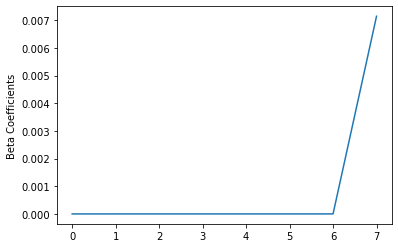

In [23]:
import matplotlib.pyplot as plt

beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

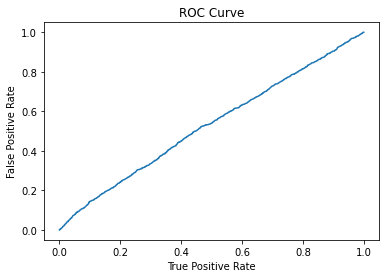

Training set areaUnderROC: 0.5298650673932042


In [24]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [25]:
predictions = lrModel.transform(test)
predictions.select('userID', 'trackID', 'label', 'probability', 
                   'rawPrediction', 'prediction' ).show(12)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|209930|  98350|  0.0|[0.49195659338251...|[-0.0321764022575...|       1.0|
|209930|  87701|  0.0|[0.50012165991210...|[4.86639658026510...|       0.0|
|209930|   4643|  1.0|[0.50840176435116...|[0.03361022102092...|       0.0|
|209930|  41700|  1.0|[0.49729106583767...|[-0.0108358426726...|       1.0|
|209930| 247441|  1.0|[0.50394049831085...|[0.01576231958196...|       0.0|
|209930| 225319|  0.0|[0.50192191414762...|[0.00768769445260...|       0.0|
|209946|  77246|  1.0|[0.49149882198555...|[-0.0340079893215...|       1.0|
|209946| 215312|  1.0|[0.49956442933074...|[-0.0017422831177...|       1.0|
|209946|  14994|  0.0|[0.49242432292478...|[-0.0303050274192...|       1.0|
|209946| 186039|  0.0|[0.50669690324234...|[0.02678921498795...|       0.0|
|209946|  72

In [26]:
# col("userID").asc() sort the user ascending
# col("probability").desc() sort the probability descending (from large to small)
sort_predictions = predictions.select('userID', 'trackID', 
                                      'label', 'probability', 
                                      'rawPrediction', 'prediction' 
                                     ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|209930|   4643|  1.0|[0.50840176435116...|[0.03361022102092...|       0.0|
|209930| 247441|  1.0|[0.50394049831085...|[0.01576231958196...|       0.0|
|209930| 225319|  0.0|[0.50192191414762...|[0.00768769445260...|       0.0|
|209930|  87701|  0.0|[0.50012165991210...|[4.86639658026510...|       0.0|
|209930|  41700|  1.0|[0.49729106583767...|[-0.0108358426726...|       1.0|
|209930|  98350|  0.0|[0.49195659338251...|[-0.0321764022575...|       1.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



In [27]:
# probability column is where you can decide 
# the 3 tracks with highest "probability" for "1" and 
# the 3 tracks with lowest "probability" for "0" 
# tracks "198762", "34503", "130183" with "1"
# tracks "30877", "8244", "227283" with "0"
sort_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|209930|   4643|  1.0|[0.50840176435116...|[0.03361022102092...|       0.0|
|209930| 247441|  1.0|[0.50394049831085...|[0.01576231958196...|       0.0|
|209930| 225319|  0.0|[0.50192191414762...|[0.00768769445260...|       0.0|
|209930|  87701|  0.0|[0.50012165991210...|[4.86639658026510...|       0.0|
|209930|  41700|  1.0|[0.49729106583767...|[-0.0108358426726...|       1.0|
|209930|  98350|  0.0|[0.49195659338251...|[-0.0321764022575...|       1.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



In [28]:
# decision tree classifier in pySpark

from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label',maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
sort_predictions = predictions.select('userID', 'trackID', 
                   'label', 'probability', 
                   'rawPrediction', 'prediction' ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+-----+--------------------+-------------+----------+
|userID|trackID|label|         probability|rawPrediction|prediction|
+------+-------+-----+--------------------+-------------+----------+
|209930| 225319|  0.0|[0.63106796116504...| [130.0,76.0]|       0.0|
|209930|   4643|  1.0|[0.56048738033072...|[644.0,505.0]|       0.0|
|209930| 247441|  1.0|[0.56048738033072...|[644.0,505.0]|       0.0|
|209930|  41700|  1.0|[0.48305084745762...|[228.0,244.0]|       1.0|
|209930|  98350|  0.0|[0.48305084745762...|[228.0,244.0]|       1.0|
|209930|  87701|  0.0|[0.43076923076923...|[476.0,629.0]|       1.0|
+------+-------+-----+--------------------+-------------+----------+
only showing top 6 rows



In [29]:
# random forest classifier in pySpark
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
sort_predictions = predictions.select('userID', 'trackID', 
                   'label', 'probability', 
                   'rawPrediction', 'prediction' ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|209930|  98350|  0.0|[0.54042093921440...|[10.8084187842880...|       0.0|
|209930| 247441|  1.0|[0.52662354506526...|[10.5324709013052...|       0.0|
|209930| 225319|  0.0|[0.50919317565587...|[10.1838635131174...|       0.0|
|209930|   4643|  1.0|[0.50368328193884...|[10.0736656387769...|       0.0|
|209930|  41700|  1.0|[0.46446973740770...|[9.28939474815415...|       1.0|
|209930|  87701|  0.0|[0.44076982921946...|[8.81539658438921...|       1.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



In [30]:
# Gradient-Boosted Tree Classifier

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
sort_predictions = predictions.select('userID', 'trackID', 
                   'label', 'probability', 
                   'rawPrediction', 'prediction' ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+-----+--------------------+--------------------+----------+
|userID|trackID|label|         probability|       rawPrediction|prediction|
+------+-------+-----+--------------------+--------------------+----------+
|209930| 225319|  0.0|[0.61555237498148...|[0.23535623577165...|       0.0|
|209930| 247441|  1.0|[0.56402179370901...|[0.12875031777547...|       0.0|
|209930|   4643|  1.0|[0.54924451734954...|[0.09880935187140...|       0.0|
|209930|  98350|  0.0|[0.44757040234410...|[-0.1052460756003...|       1.0|
|209930|  87701|  0.0|[0.43305910598493...|[-0.1346904164090...|       1.0|
|209930|  41700|  1.0|[0.39387477300455...|[-0.2155267930821...|       1.0|
+------+-------+-----+--------------------+--------------------+----------+
only showing top 6 rows



### get predictions

In [31]:
users = []
tracks = []
with open('data/testItem2.txt') as file_data:
    lines_remaining: int = 0
    current_user = None
    for line in file_data:
        line = line.strip()
        if lines_remaining == 0:
            if '|' not in line:
                raise ValueError('cannot find user seperator')
            current_user, lines_remaining = map(int, line.split('|'))
        else:
            tracks.append(int(line))
            users.append(current_user)
            lines_remaining -= 1

test_user_df = pd.DataFrame({
    'userID': users,
    'trackID': tracks,
})
all_test_data = pd.merge(test_user_df, track_df, on='trackID')

print('start describe', all_test_data.shape)
all_test_stats = all_test_data[genre_columns].apply(pd.DataFrame.describe, axis=1)
print('end describe')
all_test_data['max'], all_test_data['min'], all_test_data['mean'], all_test_data['median'] = \
    all_test_stats['max'], all_test_stats['min'], all_test_stats['mean'], all_test_stats['50%']
all_test_data['variance'] = all_test_stats['std']**2
all_test_data

start describe (120000, 26)
end describe


,userID,trackID,album,artist,genre1,genre2,genre3,genre4,genre5,genre6,...,genre18,genre19,genre20,genre21,num_genre_ratings,max,min,mean,median,variance
0,199810,208019,209288,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,233697,208019,209288,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,199810,74139,277282,271146,113360.0,173467.0,173655.0,192976.0,146792.0,48505.0,...,NaN,NaN,NaN,NaN,7,192976.0,48505.0,140273.428571,146792.0,2.372098e+09
3,199810,9903,None,None,33722.0,123396.0,79926.0,73523.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4,123396.0,33722.0,77641.750000,76724.5,1.348193e+09
4,199810,242681,190640,244574,61215.0,17453.0,274088.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,274088.0,17453.0,117585.333333,61215.0,1.884859e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,248996,13479,85536,197404,173467.0,219193.0,82064.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,219193.0,82064.0,158241.333333,173467.0,4.874956e+09
119996,248996,92369,264532,1589,131552.0,214110.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,214110.0,131552.0,172831.000000,172831.0,3.407912e+09
119997,249008,4967,205719,197877,172023.0,201738.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,201738.0,172023.0,186880.500000,186880.5,4.414906e+08
119998,249008,127497,245158,218424,33204.0,239725.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,239725.0,33204.0,136464.500000,136464.5,2.132546e+10


In [35]:
exported_df = all_test_data[['userID', 'trackID', 'album', 'artist', \
            'num_genre_ratings', 'max', 'min', 'mean', 'variance', 'median']].copy()
exported_df = exported_df.mask(exported_df.eq('None')).fillna(0)
exported_df.to_csv('data/clean_data_test.csv', index=False)
exported_df

,userID,trackID,album,artist,num_genre_ratings,max,min,mean,variance,median
0,199810,208019,209288,0,0,0.0,0.0,0.000000,0.000000e+00,0.0
1,233697,208019,209288,0,0,0.0,0.0,0.000000,0.000000e+00,0.0
2,199810,74139,277282,271146,7,192976.0,48505.0,140273.428571,2.372098e+09,146792.0
3,199810,9903,0,0,4,123396.0,33722.0,77641.750000,1.348193e+09,76724.5
4,199810,242681,190640,244574,3,274088.0,17453.0,117585.333333,1.884859e+10,61215.0
...,...,...,...,...,...,...,...,...,...,...
119995,248996,13479,85536,197404,3,219193.0,82064.0,158241.333333,4.874956e+09,173467.0
119996,248996,92369,264532,1589,2,214110.0,131552.0,172831.000000,3.407912e+09,172831.0
119997,249008,4967,205719,197877,2,201738.0,172023.0,186880.500000,4.414906e+08,186880.5
119998,249008,127497,245158,218424,2,239725.0,33204.0,136464.500000,2.132546e+10,136464.5


In [36]:
test_df = spark.read.csv('data/clean_data_test.csv', header = True, inferSchema = True)
test_df = pipelineModel.transform(test_df)

In [37]:
predictions = lrModel.transform(test_df)
predictions.select('userID', 'trackID', 'probability', 
                   'rawPrediction', 'prediction' ).show(12)

+------+-------+--------------------+--------------------+----------+
|userID|trackID|         probability|       rawPrediction|prediction|
+------+-------+--------------------+--------------------+----------+
|199810| 208019|[0.51401996046658...|[0.05609454615557...|       0.0|
|233697| 208019|[0.51401996046658...|[0.05609454615557...|       0.0|
|199810|  74139|[0.48929317723106...|[-0.0428338389461...|       1.0|
|199810|   9903|[0.49714266459510...|[-0.0114294660397...|       1.0|
|199810| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|202363| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|202522| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|204041| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|204356| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|207460| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|209438| 242681|[0.49229369971482...|[-0.0308276423128...|       1.0|
|209710| 242681|[0.4

In [38]:
predictions = dtModel.transform(test_df)
sort_predictions = predictions.select('userID', 'trackID',
                   'probability', 'rawPrediction', 'prediction').sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+--------------------+-------------+----------+
|userID|trackID|         probability|rawPrediction|prediction|
+------+-------+--------------------+-------------+----------+
|199810| 105760|         [0.57,0.43]|  [57.0,43.0]|       0.0|
|199810| 208019|[0.56048738033072...|[644.0,505.0]|       0.0|
|199810|  18515|[0.56048738033072...|[644.0,505.0]|       0.0|
|199810|   9903|[0.56048738033072...|[644.0,505.0]|       0.0|
|199810| 242681|[0.48305084745762...|[228.0,244.0]|       1.0|
|199810|  74139|[0.43076923076923...|[476.0,629.0]|       1.0|
+------+-------+--------------------+-------------+----------+
only showing top 6 rows



In [40]:
predictions = rfModel.transform(test_df)
sort_predictions = predictions.select('userID', 'trackID', 
                   'probability', 
                   'rawPrediction', 'prediction' ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+--------------------+--------------------+----------+
|userID|trackID|         probability|       rawPrediction|prediction|
+------+-------+--------------------+--------------------+----------+
|199810|   9903|[0.63458647806982...|[12.6917295613965...|       0.0|
|199810| 105760|[0.57584789400667...|[11.5169578801334...|       0.0|
|199810| 208019|[0.51681535970401...|[10.3363071940803...|       0.0|
|199810| 242681|[0.51371278361201...|[10.2742556722402...|       0.0|
|199810|  18515|[0.51011262405608...|[10.2022524811216...|       0.0|
|199810|  74139|[0.43365805456944...|[8.67316109138891...|       1.0|
+------+-------+--------------------+--------------------+----------+
only showing top 6 rows



In [41]:
predictions = gbtModel.transform(test_df)
sort_predictions = predictions.select('userID', 'trackID', 
                   'probability', 
                   'rawPrediction', 'prediction' ).sort(col("userID").asc(), col("probability").desc())
sort_predictions.show(6)

+------+-------+--------------------+--------------------+----------+
|userID|trackID|         probability|       rawPrediction|prediction|
+------+-------+--------------------+--------------------+----------+
|199810|  74139|[0.67342757685427...|[0.36186435838007...|       0.0|
|199810| 105760|[0.64924387726459...|[0.30785862253509...|       0.0|
|199810|   9903|[0.62532986944031...|[0.25611665729965...|       0.0|
|199810| 208019|[0.58887262286008...|[0.17965340686739...|       0.0|
|199810|  18515|[0.55709153957679...|[0.11468322864437...|       0.0|
|199810| 242681|[0.45682815330604...|[-0.0865592291293...|       1.0|
+------+-------+--------------------+--------------------+----------+
only showing top 6 rows



In [42]:
# output to results csv
from typing import List, Optional

predictions_df = sort_predictions.toPandas()
user_track_ids: List[str] = []
predictors: List[int] = []
for _, row in predictions_df.iterrows():
    user_id = row['userID']
    track_id = row['trackID']
    prediction = row['prediction']
    user_track_ids.append(f'{user_id}_{track_id}')
    predictors.append(1 if prediction else 0)

output_df = pd.DataFrame({'TrackID': user_track_ids, 'Predictor': predictors}).set_index('TrackID')
output_df.to_csv('data/output.csv')
output_df

,Predictor
TrackID,
199810_74139,0
199810_105760,0
199810_9903,0
199810_208019,0
199810_18515,0
...,...
249010_72192,0
249010_293818,0
249010_86104,1
